In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import datetime as dt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [223]:
company = 'AAPL'

start = dt.datetime(2012,1,1)
end = dt.datetime.now()

data = yf.download(company, start , end)

[*********************100%***********************]  1 of 1 completed


In [224]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482926,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550012,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689339,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821992,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801656,394024400
...,...,...,...,...,...,...
2023-05-26,173.320007,175.770004,173.110001,175.429993,175.429993,54835000
2023-05-30,176.960007,178.990005,176.570007,177.300003,177.300003,55964400
2023-05-31,177.330002,179.350006,176.759995,177.250000,177.250000,99625300


<Axes: xlabel='Date'>

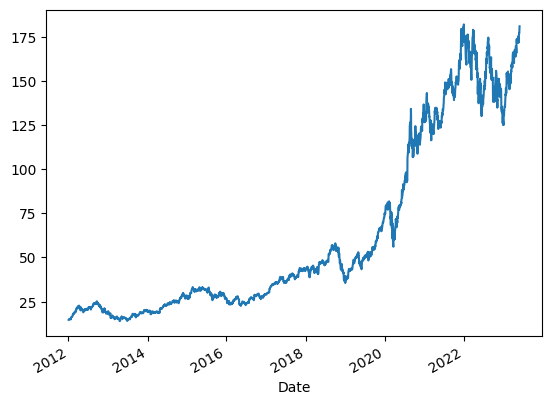

In [225]:
data["Close"].plot()

In [226]:
X = ["Open", "Volume"]
y = "Close"

In [227]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(data[X], data[y], test_size=0.2, random_state=100)

numerical_features = data[X].select_dtypes(include=['float64', 'int64'])

numerical_columns = numerical_features.columns

ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

X_Train = ct.fit_transform(X_Train)
X_Test = ct.transform(X_Test)

In [228]:
model = xgb.XGBRegressor()

In [229]:
model.fit(X_Train, Y_Train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [230]:
pred = model.predict(X_Test)

print(pred)

[ 53.120987  21.7776    89.76342  119.733376  27.705803  37.458794
  26.033438  65.89111  146.05475   55.288116 167.01248  114.46539
  28.291155 133.72092   15.017595  19.88413   18.018396  36.37813
  61.89903  134.55298   44.504326 131.52397   21.76494   24.618172
  17.683498 108.65903   43.057934 169.2138    15.111707  26.500525
  18.338392 148.85886   94.170845 110.188995  56.930798  24.699635
  42.143055  19.888535  20.960445  20.939806 116.58462   39.85628
  40.89519   42.599297  20.600746 133.83817   23.941196  28.29139
  42.716667  33.592236 134.61539  163.28937   18.782812  37.07426
  43.45848   45.59603   15.515691  21.254866  24.013412 125.4819
  55.297195  42.147797  39.76552   24.96655  171.19899   28.577124
  21.743454  30.12637   17.504473  16.34198   39.101578  22.140665
  42.64256   65.09853  158.83202   44.826153 149.66481   48.27725
 163.1768   142.54727   15.378462  66.887024  37.244164  15.849977
  16.359667  79.28888   63.073643 134.25075   50.822697  29.337498
  5

In [231]:
accuracy = model.score(X_Test, Y_Test)

In [232]:
accuracy

0.999052014956626

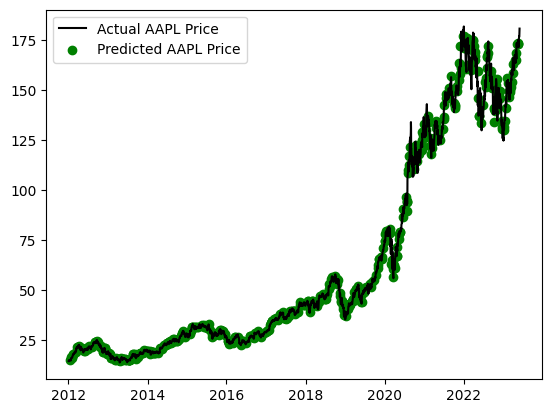

In [233]:
plt.plot(data["Close"], label = f"Actual {company} Price", color="black")
plt.scatter(Y_Test.index, pred, label = f"Predicted {company} Price", color="green", linewidths=1)
plt.legend()
plt.show()

In [234]:
last_date = data.iloc[-1:]

In [235]:
last_date

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-02,181.029999,181.779999,179.259995,180.949997,180.949997,61945900


In [236]:
real_pred = ct.transform(last_date[X])

In [237]:
model.predict(real_pred)

array([180.7526], dtype=float32)

In [238]:
import pickle as pkl

pkl.dump(model, open(f"{company}_lr_model.pkl", "wb"))

In [239]:
pkl.dump(ct, open(f"{company}_lr_scaler.pkl", "wb"))